Validation MSE: 113.75798471459352
Test MSE: 754.7095667211427


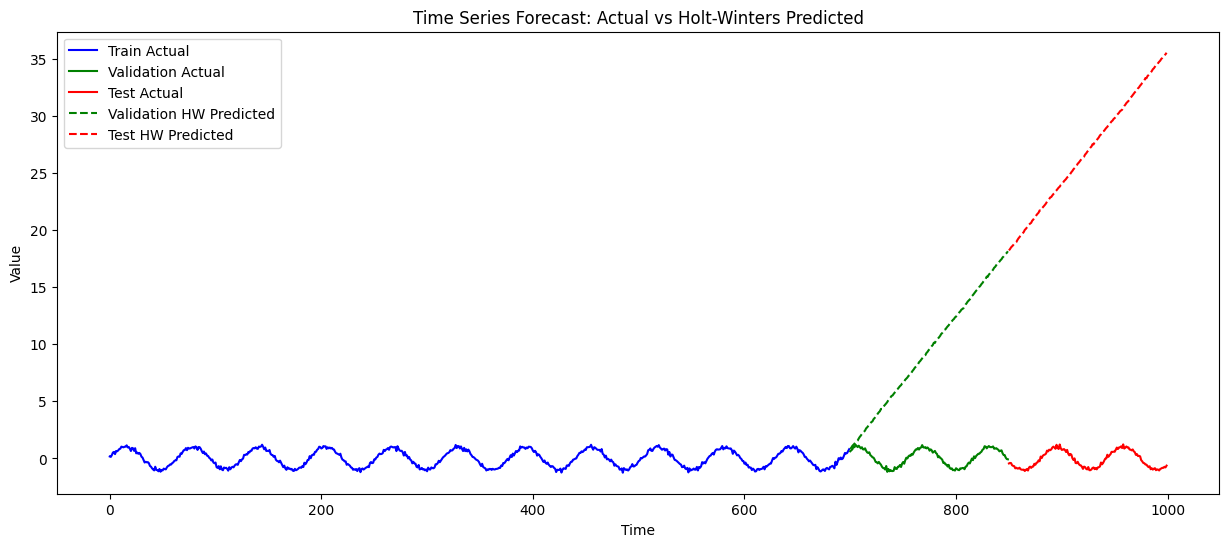

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
df = pd.read_csv('time_series_data.csv')
data = df['data'].values

# Define lengths of train, validation, and test sets
train_end = 700
val_end = 850

# Split the data
train_data = data[:train_end]
val_data = data[train_end:val_end]
test_data = data[val_end:]

# Fit Holt-Winters model on training data
model_hw = ExponentialSmoothing(train_data, seasonal_periods=50, trend='add', seasonal='add').fit()

# Forecast on the validation and test sets
val_pred_hw = model_hw.forecast(len(val_data))
test_pred_hw = model_hw.forecast(len(val_data) + len(test_data))[len(val_data):]

# Calculate MSE
mse_val_hw = np.mean((val_data - val_pred_hw) ** 2)
mse_test_hw = np.mean((test_data - test_pred_hw) ** 2)

# Print MSE values
print(f'Validation MSE: {mse_val_hw}')
print(f'Test MSE: {mse_test_hw}')
time = np.arange(len(data))
# Plot the actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(time[:train_end], train_data, 'b-', label='Train Actual')
plt.plot(time[train_end:val_end], val_data, 'g-', label='Validation Actual')
plt.plot(time[val_end:], test_data, 'r-', label='Test Actual')
plt.plot(time[train_end:val_end], val_pred_hw, 'g--', label='Validation HW Predicted')
plt.plot(time[val_end:], test_pred_hw, 'r--', label='Test HW Predicted')
plt.title('Time Series Forecast: Actual vs Holt-Winters Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


d:\college\MSRIT\workshop\msr_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2105 - val_loss: 0.0813
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0696 - val_loss: 0.0426
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0453 - val_loss: 0.0337
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0379 - val_loss: 0.0302
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0322 - val_loss: 0.0275
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0308 - val_loss: 0.0252
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0284 - val_loss: 0.0231
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0252 - val_loss: 0.0211
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0266 - val_loss: 0.0193
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0243 - val_loss: 0.0177
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0204 - val_loss: 0.0160
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0

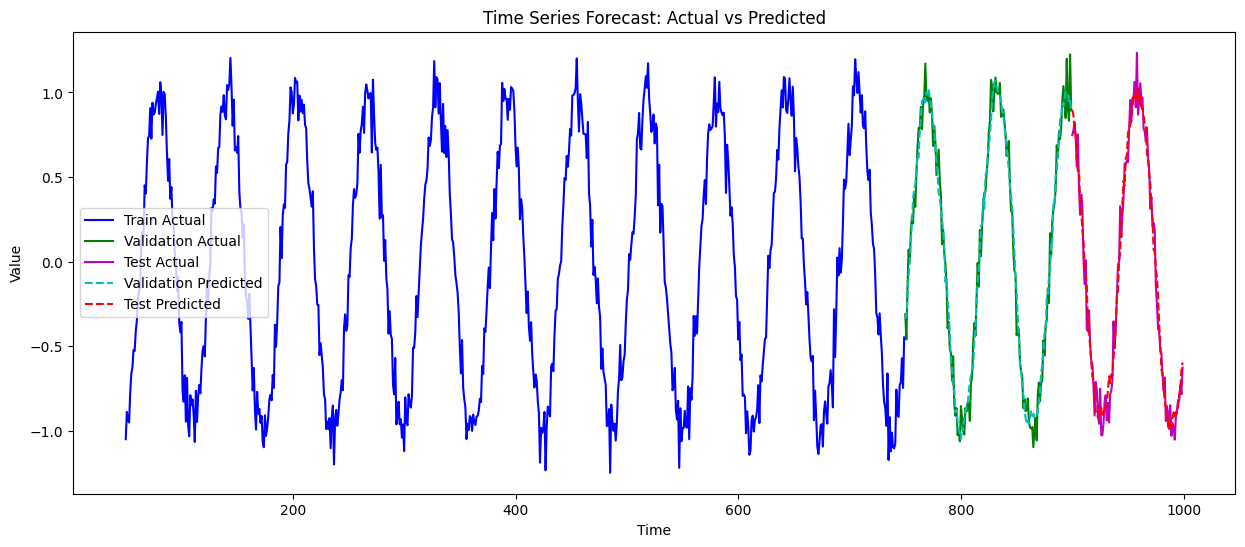

Validation MSE: 0.010134964353858163
Test MSE: 0.012044332610826563


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
df = pd.read_csv('time_series_data.csv')
data = df['data'].values

# Define the function to create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Create sequences of 50 previous time steps (n_steps)
n_steps = 50
X, y = create_sequences(data, n_steps)

# Split the data into training, validation, and test sets
X_train, y_train = X[:700], y[:700]
X_valid, y_valid = X[700:850], y[700:850]
X_test, y_test = X[850:], y[850:]

# Reshape the input data for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
model = Sequential([
    SimpleRNN(10, input_shape=(n_steps, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Predict the next value for each sequence in the validation and test set
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

# Compute the mean squared error as a measure of model performance
mse_valid = np.mean((y_valid - y_pred_valid.flatten()) ** 2)
mse_test = np.mean((y_test - y_pred_test.flatten()) ** 2)

# Plotting
plt.figure(figsize=(15, 6))
time_steps = np.arange(0, 1000, step=1)

# Actual Data
plt.plot(time_steps[n_steps:700+n_steps], y_train, 'b-', label='Train Actual')
plt.plot(time_steps[700+n_steps:850+n_steps], y_valid, 'g-', label='Validation Actual')
plt.plot(time_steps[850+n_steps:], y_test, 'm-', label='Test Actual')

# Predicted Data
plt.plot(time_steps[700+n_steps:850+n_steps], y_pred_valid.flatten(), 'c--', label='Validation Predicted')
plt.plot(time_steps[850+n_steps:], y_pred_test.flatten(), 'r--', label='Test Predicted')

plt.title('Time Series Forecast: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Print MSE values
print(f"Validation MSE: {mse_valid}")
print(f"Test MSE: {mse_test}")

Epoch 1/20


d:\college\MSRIT\workshop\msr_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.5393 - val_loss: 0.3797
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3362 - val_loss: 0.2449
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2180 - val_loss: 0.1681
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1459 - val_loss: 0.1176
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1015 - val_loss: 0.0739
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0593 - val_loss: 0.0367
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0289 - val_loss: 0.0153
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0148 - val_loss: 0.0113
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0118 - val_loss: 0.0104
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0122 - val_loss: 0.0102
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0113 - val_loss: 0.0101
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0123 - val_l

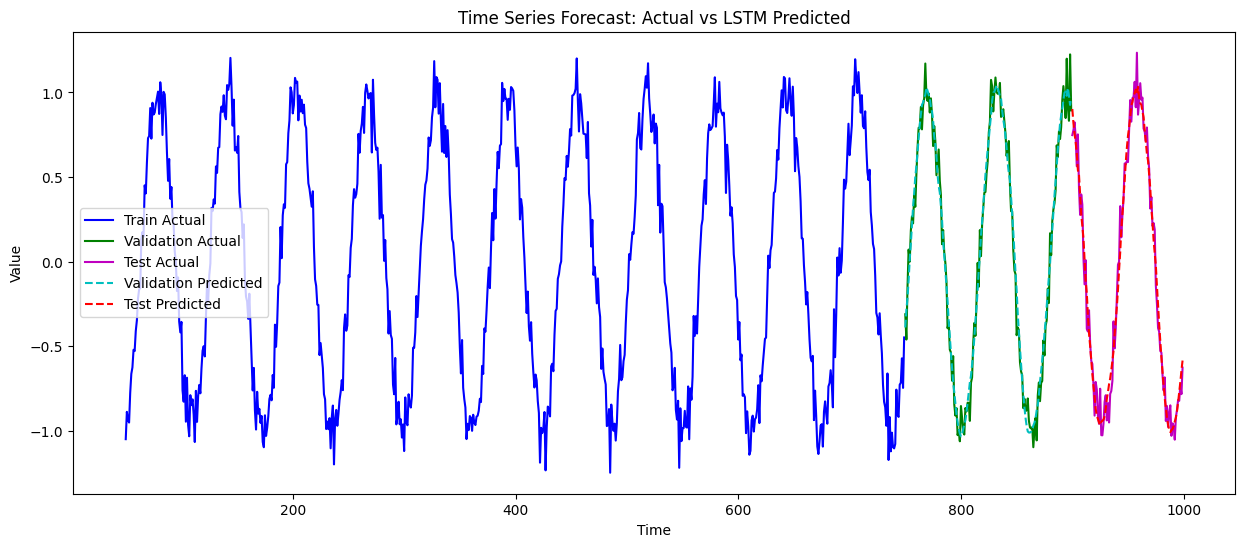

Validation MSE: 0.009391159791129916
Test MSE: 0.010670680807967124


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('time_series_data.csv')
data = df['data'].values

# Define the function to create sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Create sequences of 50 previous time steps (n_steps)
n_steps = 50
X, y = create_sequences(data, n_steps)

# Split the data into training, validation, and test sets
X_train, y_train = X[:700], y[:700]
X_valid, y_valid = X[700:850], y[700:850]
X_test, y_test = X[850:], y[850:]

# Reshape the input data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(10, input_shape=(n_steps, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Predict the next value for each sequence in the validation and test set
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

# Compute the mean squared error as a measure of model performance
mse_valid = np.mean((y_valid - y_pred_valid.flatten()) ** 2)
mse_test = np.mean((y_test - y_pred_test.flatten()) ** 2)

# Plotting
plt.figure(figsize=(15, 6))

# Plot the actual data
plt.plot(time[n_steps:700+n_steps], y_train, 'b-', label='Train Actual')
plt.plot(time[700+n_steps:850+n_steps], y_valid, 'g-', label='Validation Actual')
plt.plot(time[850+n_steps:], y_test, 'm-', label='Test Actual')

# Plot the predictions
plt.plot(time[700+n_steps:850+n_steps], y_pred_valid.flatten(), 'c--', label='Validation Predicted')
plt.plot(time[850+n_steps:], y_pred_test.flatten(), 'r--', label='Test Predicted')

plt.title('Time Series Forecast: Actual vs LSTM Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Output the MSE values
print(f"Validation MSE: {mse_valid}")
print(f"Test MSE: {mse_test}")